In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from math import sqrt

In [2]:
data = [pd.read_csv('./2018.csv'), pd.read_csv('./2019.csv')]

In [3]:
data[0].isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [4]:
data[0].dropna(inplace=True)

In [5]:
data[0].isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
data[1].isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [7]:
data[0].describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.877419,5.366897,0.883677,1.216058,0.596877,0.455606,0.180974,0.112000
std,45.076463,1.117433,0.380942,0.301286,0.248312,0.162367,0.098789,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.500000,4.451500,0.612500,1.075500,0.420500,0.357500,0.109000,0.051000
50%,79.000000,5.358000,0.940000,1.258000,0.643000,0.493000,0.173000,0.082000
75%,117.500000,6.154000,1.192500,1.464000,0.778500,0.579000,0.240000,0.137000
max,156.000000,7.632000,1.649000,1.644000,1.030000,0.724000,0.598000,0.457000


In [8]:
data[1].describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [9]:
data[0]['Year'] = "2018"
data[1]['Year'] = "2019"

In [10]:
data_concat = pd.concat(data)

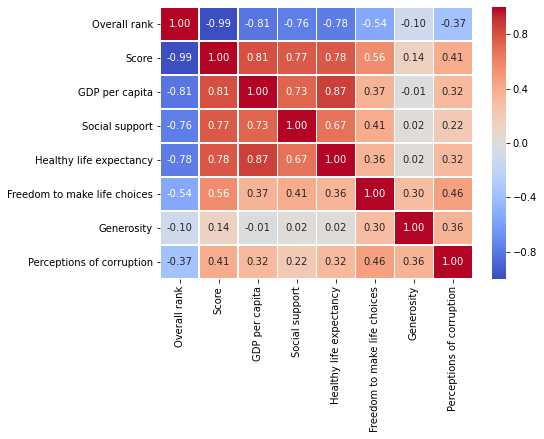

In [11]:
plt.figure(figsize=(7, 5))
sns.heatmap(data[0].corr(), annot=True, fmt = '.2f', linewidths=.5, annot_kws={'size':10}, vmin=-1, vmax=1, cmap='coolwarm')

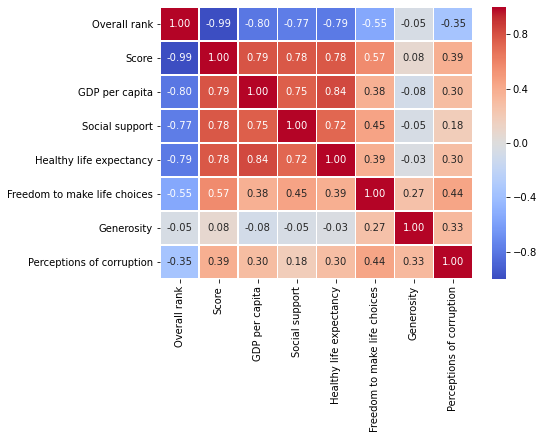

In [12]:
plt.figure(figsize=(7, 5))
sns.heatmap(data[1].corr(), annot=True, fmt = '.2f', linewidths=.5, annot_kws={'size':10}, vmin=-1, vmax=1, cmap='coolwarm')

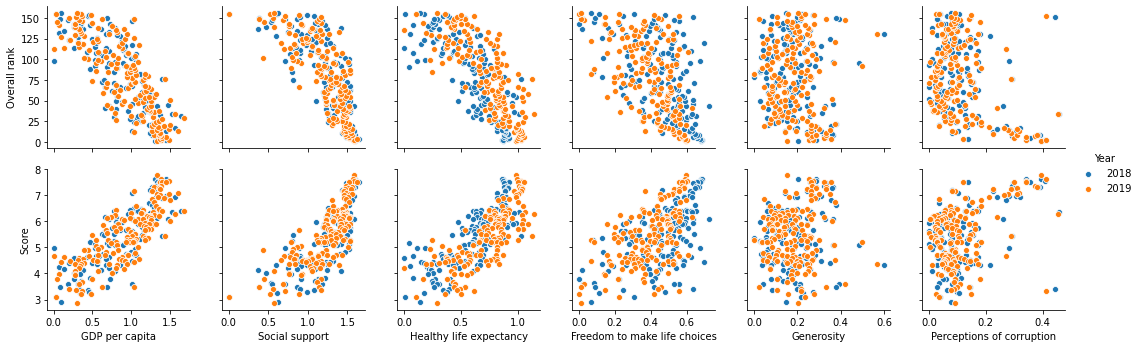

In [13]:
delete_vars = ['Overall rank', 'Score', 'Year', 'Country or region']
x_vars = data_concat.drop(delete_vars, axis=1).columns
y_vars = ['Overall rank', 'Score']
sns.pairplot(data_concat, hue='Year', diag_kind='hist', x_vars=x_vars, y_vars=y_vars)

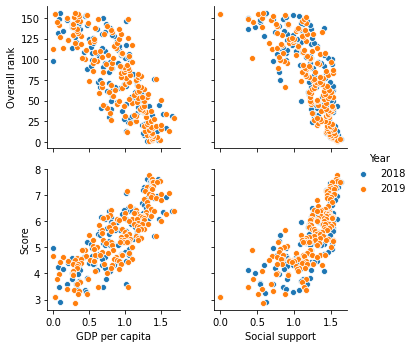

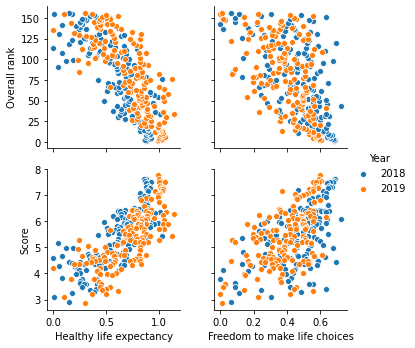

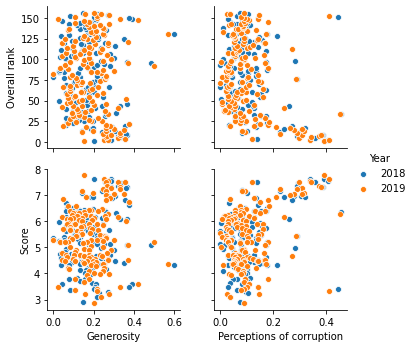

In [14]:
X_vars = [['GDP per capita', 'Social support'], ['Healthy life expectancy', 'Freedom to make life choices'], ['Generosity', 'Perceptions of corruption']]
y_vars = ['Overall rank', 'Score']
for x_vars in X_vars:
    sns.pairplot(data_concat, hue='Year', diag_kind='hist', x_vars=x_vars, y_vars=y_vars)

In [15]:
droped = data_concat.drop(delete_vars, axis=1)

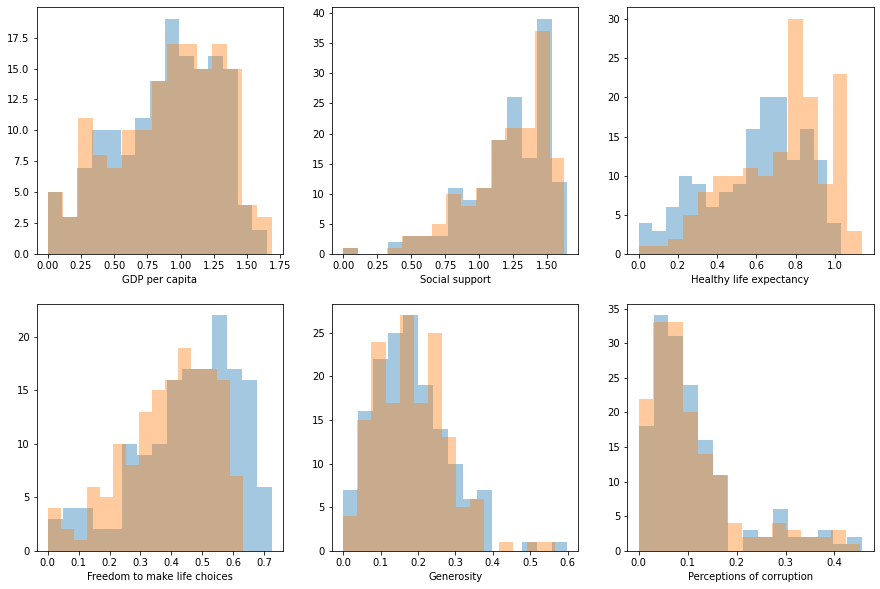

In [16]:
fig = plt.figure(figsize=(15, 10))
for i, index in enumerate(droped.columns):
    ax = fig.add_subplot(2, droped.shape[1]//2, i+1)
    sns.distplot(data[0][index], bins=15, kde=False)
    sns.distplot(data[1][index], bins=15, kde=False)
plt.show()

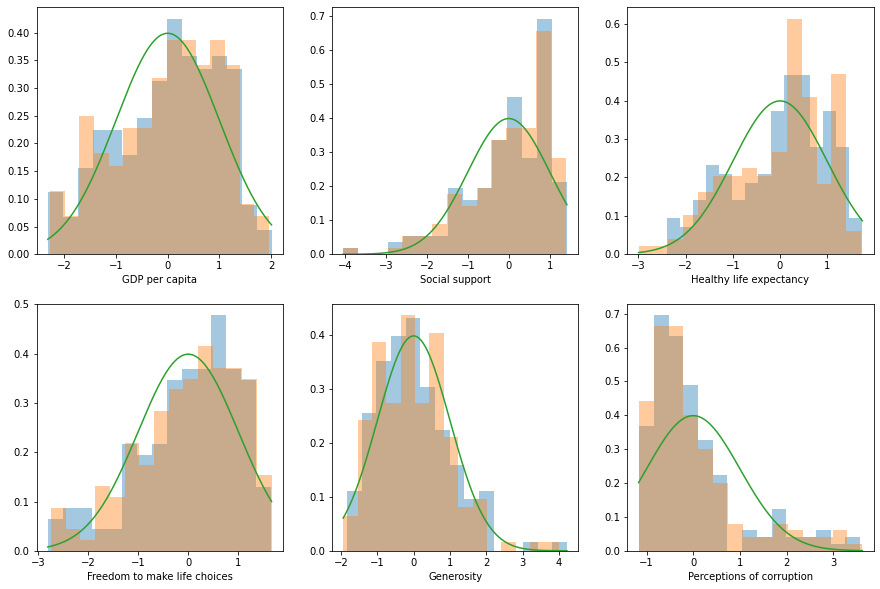

In [17]:
fig = plt.figure(figsize=(15, 10))
for i, index in enumerate(droped.columns):
    ax = fig.add_subplot(2, droped.shape[1]//2, i+1)
    x0 = (data[0][index]-data[0][index].mean())/data[0][index].std()
    x1 = (data[1][index]-data[1][index].mean())/data[1][index].std()
    sns.distplot(x0, bins=15, kde=False, norm_hist=True)
    sns.distplot(x1, bins=15, kde=False, norm_hist=True)
    x = np.arange(min(x0.min(), x1.min()), max(x0.max(), x1.max()), 0.001)
    ax.plot(x, stats.norm.pdf(x))
plt.show()

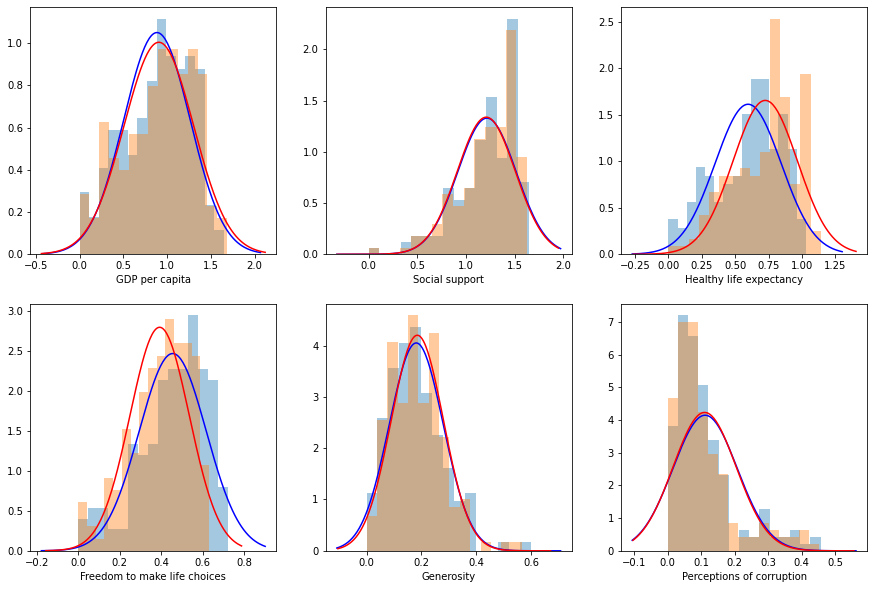

In [18]:
fig = plt.figure(figsize=(15, 10))
for i, index in enumerate(droped.columns):
    ax = fig.add_subplot(2, droped.shape[1]//2, i+1)
    sns.distplot(data[0][index], bins=15, kde=False, fit=stats.norm, fit_kws={'color':'blue'})
    sns.distplot(data[1][index], bins=15, kde=False, fit=stats.norm, fit_kws={'color':'red'})
plt.show()

In [19]:
data_concat.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,78.688103,5.387061,0.894447,1.212424,0.661267,0.423987,0.182916,0.111299
std,45.054689,1.113653,0.389311,0.299774,0.253131,0.156074,0.096895,0.095365
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.512500,0.608000,1.057000,0.487500,0.325500,0.108500,0.050000
50%,79.000000,5.373000,0.960000,1.266000,0.700000,0.450000,0.175000,0.082000
75%,117.500000,6.173500,1.214500,1.458000,0.859000,0.540500,0.245000,0.140500
max,156.000000,7.769000,1.684000,1.644000,1.141000,0.724000,0.598000,0.457000


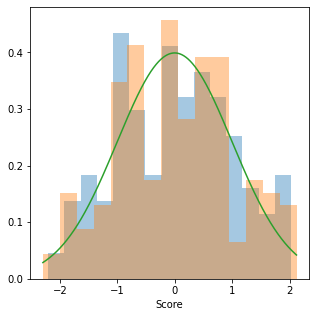

In [20]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1)
index = 'Score'
x0 = (data[0][index]-data[0][index].mean())/data[0][index].std()
x1 = (data[1][index]-data[1][index].mean())/data[1][index].std()
sns.distplot(x0, bins=15, kde=False, norm_hist=True)
sns.distplot(x1, bins=15, kde=False, norm_hist=True)
x = np.arange(min(x0.min(), x1.min()), max(x0.max(), x1.max()), 0.001)
ax.plot(x, stats.norm.pdf(x))
plt.show()

In [5]:
# https://ko.wikipedia.org/wiki/G20
G20 = ['South Korea', 'Australia', 'Canada', 'Saudi Arabia', 'United States', 'India', 'Russia', 'South Africa', 'Turkey', 'Argentina', 'Brazil', 'Mexico', 'France', 'Germany', 'Italy', 'United Kingdom', 'China', 'Indonesia', 'Japan']

In [6]:
def G20_Happy(data, value='Score'):
    Happy = [data[data['Country or region'] == i][value].values.item() for i in G20]
    return (np.mean(np.array(Happy))-data[value].mean())/data[value].std()*sqrt(len(G20))

In [7]:
G20_Happy(data[0])

2.8668278233008233

In [8]:
G20_Happy(data[1])

2.6371050447775257

In [ ]:
def Check_Norm(data, value='Score'):
    